In [ ]:
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from google.colab import drive
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
model = load_model('/content/drive/MyDrive/Fungi2/model.h5')
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ efficientnetb7 (Functional)          │ (None, 5, 5, 2560)          │      64,097,687 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 64000)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_7                │ (None, 64000)               │         256,000 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 2048)                │     131,074,048 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_8                │ (None, 2048)                │           8,192 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 1024)                │       2,098,176 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_9                │ (None, 1024)                │           4,096 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 1024)                │       1,049,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_10               │ (None, 1024)                │           4,096 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 512)                 │         524,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_11               │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_12               │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 32)                  │           8,224 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_13               │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 5)                   │             165 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 199,259,614 (760.12 MB)

 Trainable params: 135,024,133 (515.08 MB)

 Non-trainable params: 64,235,479 (245.04 MB)

 Optimizer params: 2 (12.00 B)

Saving H1_8a_9.jpg.jpg to H1_8a_9.jpg.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 504ms/step
H1_8a_9.jpg.jpg
[[0.7089096  0.27545765 0.00413978 0.00322877 0.00826426]]
This is Candida Albicans


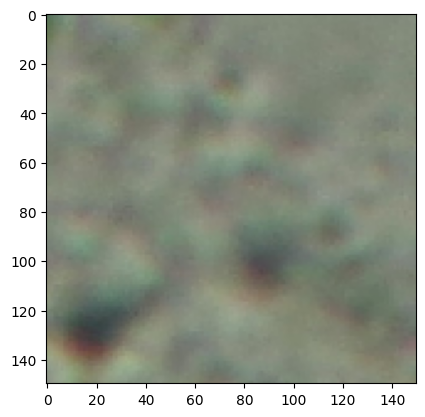

In [ ]:
uploaded = files.upload()

for fn in uploaded.keys():
    path = fn
    img = image.load_img(path, target_size=(150, 150))

    imgplot = plt.imshow(img)

    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)

    images = np.vstack([x])

    classes = model.predict(images, batch_size=10)

    print(fn)
    print(classes)

    class_index = np.argmax(classes[0])
    class_probability = classes[0][class_index]

    threshold = 0.5

    if class_probability >= threshold:
        if class_index == 0:
            print('This is Candida Albicans')
        elif class_index == 1:
            print('This is Aspergillus Niger')
        elif class_index == 2:
            print('This is Trichophyton Rubrum')
        elif class_index == 3:
            print('This is Trichophyton Mentagrophytes')
        elif class_index == 4:
            print('This is Epidermophyton Floccosum')
    else:
        print('Unknown')


Saving H2_7a_3.jpg.jpg to H2_7a_3.jpg.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 444ms/step
H2_7a_3.jpg.jpg
[[3.1666004e-03 9.9479669e-01 3.6223285e-04 2.4321551e-05 1.6501677e-03]]
This is Aspergillus Niger


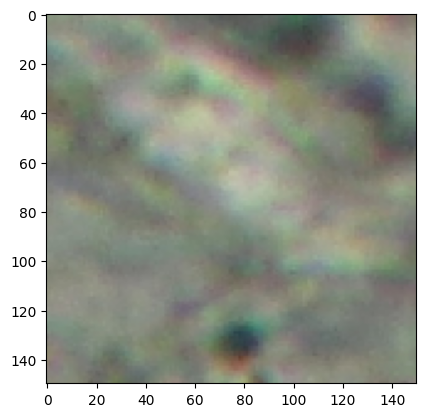

In [ ]:
uploaded = files.upload()

for fn in uploaded.keys():
    path = fn
    img = image.load_img(path, target_size=(150, 150))

    imgplot = plt.imshow(img)

    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)

    images = np.vstack([x])

    classes = model.predict(images, batch_size=10)

    print(fn)
    print(classes)

    class_index = np.argmax(classes[0])
    class_probability = classes[0][class_index]

    threshold = 0.5

    if class_probability >= threshold:
        if class_index == 0:
            print('This is Candida Albicans')
        elif class_index == 1:
            print('This is Aspergillus Niger')
        elif class_index == 2:
            print('This is Trichophyton Rubrum')
        elif class_index == 3:
            print('This is Trichophyton Mentagrophytes')
        elif class_index == 4:
            print('This is Epidermophyton Floccosum')
    else:
        print('Unknown')


Saving H3_11a_1.jpg.jpg to H3_11a_1.jpg.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 343ms/step
H3_11a_1.jpg.jpg
[[2.0069242e-03 1.2651598e-02 9.7536659e-01 9.5474143e-03 4.2748527e-04]]
This is Trichophyton Rubrum


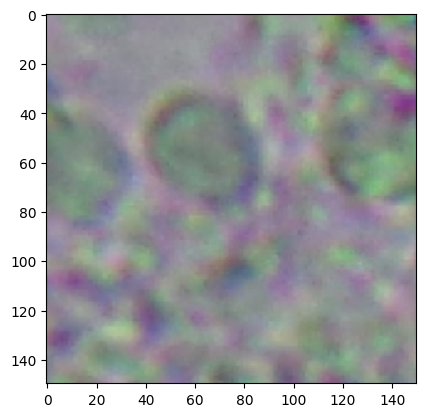

In [ ]:
uploaded = files.upload()

for fn in uploaded.keys():
    path = fn
    img = image.load_img(path, target_size=(150, 150))

    imgplot = plt.imshow(img)

    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)

    images = np.vstack([x])

    classes = model.predict(images, batch_size=10)

    print(fn)
    print(classes)

    class_index = np.argmax(classes[0])
    class_probability = classes[0][class_index]

    threshold = 0.5

    if class_probability >= threshold:
        if class_index == 0:
            print('This is Candida Albicans')
        elif class_index == 1:
            print('This is Aspergillus Niger')
        elif class_index == 2:
            print('This is Trichophyton Rubrum')
        elif class_index == 3:
            print('This is Trichophyton Mentagrophytes')
        elif class_index == 4:
            print('This is Epidermophyton Floccosum')
    else:
        print('Unknown')


Saving H5_63b_1.jpg.jpg to H5_63b_1.jpg.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 327ms/step
H5_63b_1.jpg.jpg
[[8.2031067e-04 2.0777305e-05 9.7670476e-04 9.9767703e-01 5.0519104e-04]]
This is Trichophyton Mentagrophytes


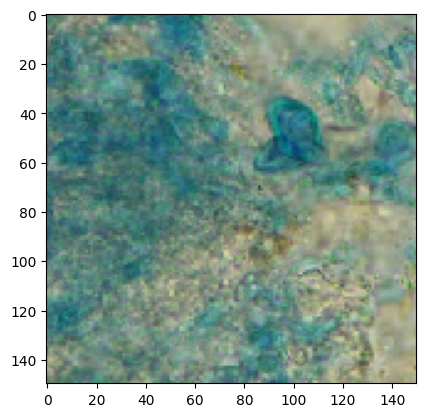

In [ ]:
uploaded = files.upload()

for fn in uploaded.keys():
    path = fn
    img = image.load_img(path, target_size=(150, 150))

    imgplot = plt.imshow(img)

    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)

    images = np.vstack([x])

    classes = model.predict(images, batch_size=10)

    print(fn)
    print(classes)

    class_index = np.argmax(classes[0])
    class_probability = classes[0][class_index]

    threshold = 0.5

    if class_probability >= threshold:
        if class_index == 0:
            print('This is Candida Albicans')
        elif class_index == 1:
            print('This is Aspergillus Niger')
        elif class_index == 2:
            print('This is Trichophyton Rubrum')
        elif class_index == 3:
            print('This is Trichophyton Mentagrophytes')
        elif class_index == 4:
            print('This is Epidermophyton Floccosum')
    else:
        print('Unknown')


Saving H6_32a_3.jpg.jpg to H6_32a_3.jpg.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 349ms/step
H6_32a_3.jpg.jpg
[[5.1585963e-04 1.0105639e-03 1.8586859e-03 3.1299796e-03 9.9348491e-01]]
This is Epidermophyton Floccosum


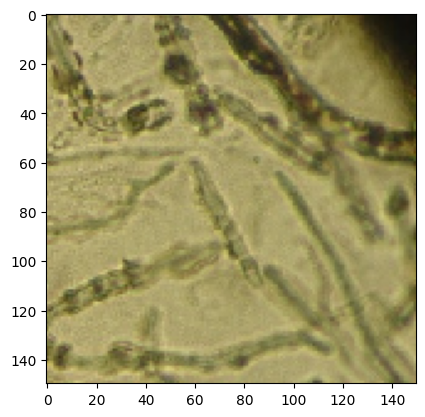

In [ ]:
uploaded = files.upload()

for fn in uploaded.keys():
    path = fn
    img = image.load_img(path, target_size=(150, 150))

    imgplot = plt.imshow(img)

    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)

    images = np.vstack([x])

    classes = model.predict(images, batch_size=10)

    print(fn)
    print(classes)

    class_index = np.argmax(classes[0])
    class_probability = classes[0][class_index]

    threshold = 0.5

    if class_probability >= threshold:
        if class_index == 0:
            print('This is Candida Albicans')
        elif class_index == 1:
            print('This is Aspergillus Niger')
        elif class_index == 2:
            print('This is Trichophyton Rubrum')
        elif class_index == 3:
            print('This is Trichophyton Mentagrophytes')
        elif class_index == 4:
            print('This is Epidermophyton Floccosum')
    else:
        print('Unknown')


COBA KITA TEST YAGESSYAAAA

Saving FOTO MICRO.jpeg to FOTO MICRO.jpeg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 360ms/step
FOTO MICRO.jpeg
[[0.00718601 0.00102117 0.00905768 0.9782762  0.00445897]]
This is Trichophyton Mentagrophytes


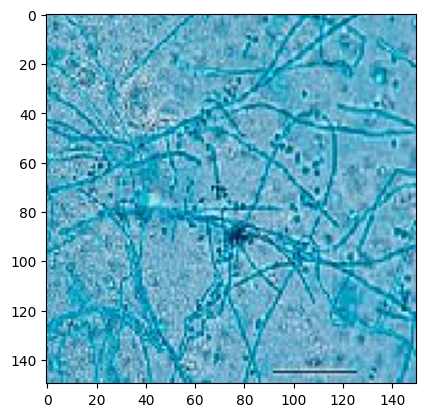

In [ ]:
uploaded = files.upload()

for fn in uploaded.keys():
    path = fn
    img = image.load_img(path, target_size=(150, 150))

    imgplot = plt.imshow(img)

    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)

    images = np.vstack([x])

    classes = model.predict(images, batch_size=10)

    print(fn)
    print(classes)

    class_index = np.argmax(classes[0])
    class_probability = classes[0][class_index]

    threshold = 0.5

    if class_probability >= threshold:
        if class_index == 0:
            print('This is Candida Albicans')
        elif class_index == 1:
            print('This is Aspergillus Niger')
        elif class_index == 2:
            print('This is Trichophyton Rubrum')
        elif class_index == 3:
            print('This is Trichophyton Mentagrophytes')
        elif class_index == 4:
            print('This is Epidermophyton Floccosum')
    else:
        print('Unknown')
